# Vanilla network:-


In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist


import pandas as pd
import numpy as np
import time
import gc
import os
import sys
import dill
from matplotlib import pyplot as plt
from keras import backend as K
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, SpatialDropout2D
from keras.layers import Convolution2D, MaxPooling2D
import warnings

from keras.layers import Activation
warnings.filterwarnings("ignore")
%matplotlib inline
from keras.layers import Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.optimizers import SGD, Nadam, Adam
import tensorflow_probability as tfp
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


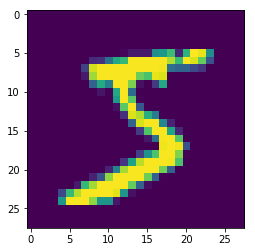

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
from keras.layers import Dense, Dropout, Flatten, Add, BatchNormalization


In [11]:
model = Sequential()
model.add(Convolution2D(32, 3, 3,kernel_regularizer=l2(0.001), input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(10, 1,kernel_regularizer=l2(0.001),))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3,3,kernel_regularizer=l2(0.001),)) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3,3,kernel_regularizer=l2(0.001),)) # 10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Convolution2D(16, 3,3,kernel_regularizer=l2(0.001),)) # 8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Convolution2D(16, 3,3,kernel_regularizer=l2(0.001),)) #6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1,kernel_regularizer=l2(0.001),)) #6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(10, 6,6,kernel_regularizer=l2(0.001),))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

W0904 16:08:14.633267 139764618725248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 16:08:14.648671 139764618725248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 16:08:14.651057 139764618725248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 16:08:14.678142 139764618725248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0904 16:08:14.679052 1397646187

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 10)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

In [13]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1,
          validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

W0904 16:08:15.983012 139764618725248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 16:08:16.218265 139764618725248 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 10s 163us/step - loss: 0.3285 - acc: 0.9292 - val_loss: 0.2680 - val_acc: 0.9460
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 113us/step - loss: 0.1361 - acc: 0.9798 - val_loss: 0.1112 - val_acc: 0.9861
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 113us/step - loss: 0.1062 - acc: 0.9835 - val_loss: 0.0949 - val_acc: 0.9855
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 7s 111us/step - loss: 0.0921 - acc: 0.9851 - val_loss: 0.1245 - val_acc: 0.9727
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03364224627912044, 0.9941]


In [0]:
image_index = 6555
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
print(Y_test[6555])
print(y_test[6555])

In [0]:
y_pred = model.predict(X_test)

In [19]:
numberofincorrect = 0
incorrectpos = []
for i in range(0,10000):
    if(y_pred[i].argmax() != y_test[i] ):
#         print("POS ",i)
#         print("Y_pred ",y_pred[i].argmax())
#         print("Y_test ",y_test[i])
#         print(" f u ")
        numberofincorrect = numberofincorrect + 1 
        incorrectpos.append(i)
        
print("numberofincorrect ",numberofincorrect)

numberofincorrect  59


Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '1')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '9')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '1')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '4')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '4')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '9')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '1')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '0')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '9')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '9')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '8')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Predictions and output')

Text(0.5, 1.0, '1')

Text(0.5, 0.98, 'Predictions and output')

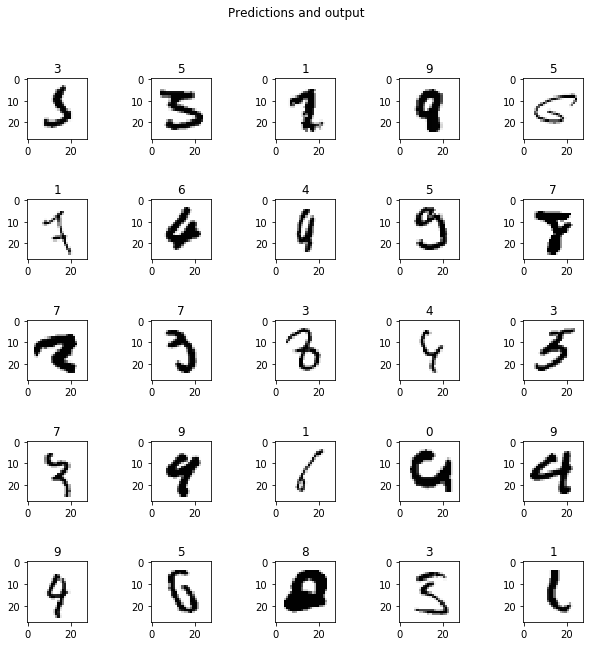

In [20]:
#To print 25 incorrectly predicted images

# for i in range (0,26):
#   image_index = incorrectpos[i]
#   plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  
w=28
h=28
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 26):
    image_index = incorrectpos[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
    plt.title(y_pred[image_index].argmax())
    plt.subplots_adjust(hspace=1, wspace=1)
    plt.suptitle("Predictions and output")
#     print(y_test[image_index])
    
    
plt.show()
#   pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
#   print(pred.argmax())
#   print(Y_test[i])
#   print(y_test[i])

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[2.59187005e-10 1.08775914e-07 3.09556967e-08 9.88166846e-08
  3.72222614e-10 1.83244886e-08 3.27377231e-12 9.99999762e-01
  7.75588690e-11 1.75636305e-08]
 [7.29506382e-06 5.60262197e-05 9.99852419e-01 6.25053985e-07
  1.02972386e-07 3.79916969e-08 7.95950764e-05 3.01640526e-08
  3.91387448e-06 4.85780127e-09]
 [2.30878769e-07 9.99961853e-01 1.48965137e-06 4.21136050e-08
  4.37215340e-06 2.72597867e-06 8.16423199e-06 2.06084933e-05
  1.97037863e-07 2.41852973e-07]
 [9.99913216e-01 1.83201081e-08 2.75594601e-07 9.16120726e-08
  2.16336090e-07 3.69058148e-06 4.26535553e-05 8.93675747e-08
  1.76255107e-05 2.22076742e-05]
 [4.42138237e-09 3.63745940e-08 2.03637729e-09 2.00561984e-10
  9.99974370e-01 1.19971491e-08 2.62055320e-08 9.37713693e-08
  2.73755099e-08 2.54718143e-05]
 [1.40382724e-07 9.99957204e-01 2.20626430e-06 2.09773638e-08
  1.94988479e-06 5.05665867e-07 2.29077182e-06 3.53159230e-05
  1.16548641e-07 2.28245582e-07]
 [3.84637522e-09 1.19984270e-05 4.27075975e-08 1.27593647e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])


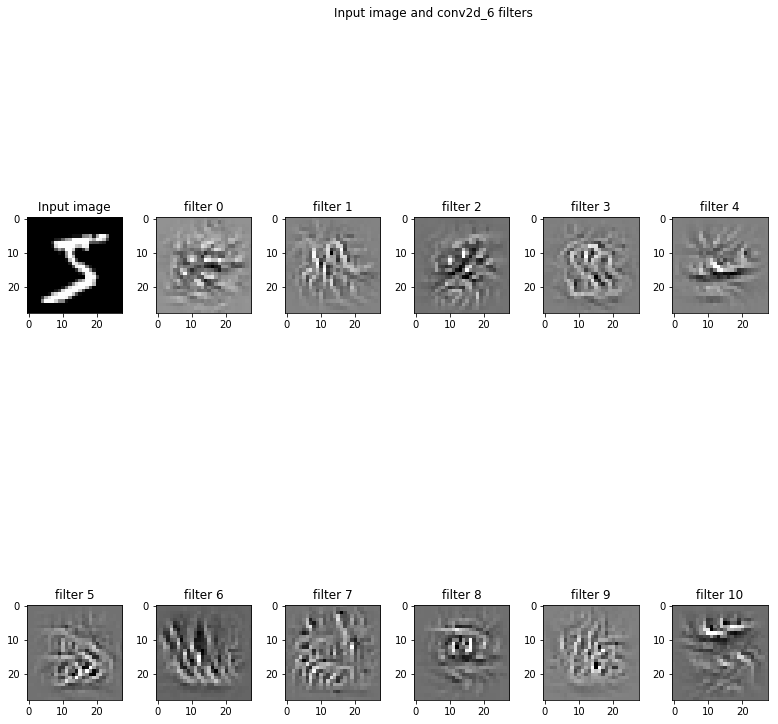

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_6'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()
